We import the necessary packages and import the dataset

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
df = pd.read_csv("loan prediction.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

Our dataset contains 13 columns and 614 rows

*   Loan_ID: It's the unique ID of a loan applicant
*   Gender: The gender of the applicant
*   Married: The martial status of the applicant
*   Dependents: The number of applicant's dependents
*   Education: The level of education of the applicant
*   Self_Emplyoed: Flag indicating whether the applicant is self-employed or not
*   ApplicantIncome: Income of the applicant
*   CoapplicantIncome: Income of the co-applicant
*   LoanAmount: Amount asked by the loan
*   LoanMaountTerm: Duration of the loan
*   Credit_History: Flag indicating if
an applicant has ever had a loan or not
*   Property_Area: Area of primary residency
 of the applicant
*   Loan_Status: Target variable indicating whether the loan was given to the applicant or not

The goal of this project is to predict the loan status based on the applicants variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Data Viz and Analysis

We print bargraphs to visualize the frequency of categorical variables per Loan_Status(Target variables). This to help us understand the relationship between certain variables and the target variables

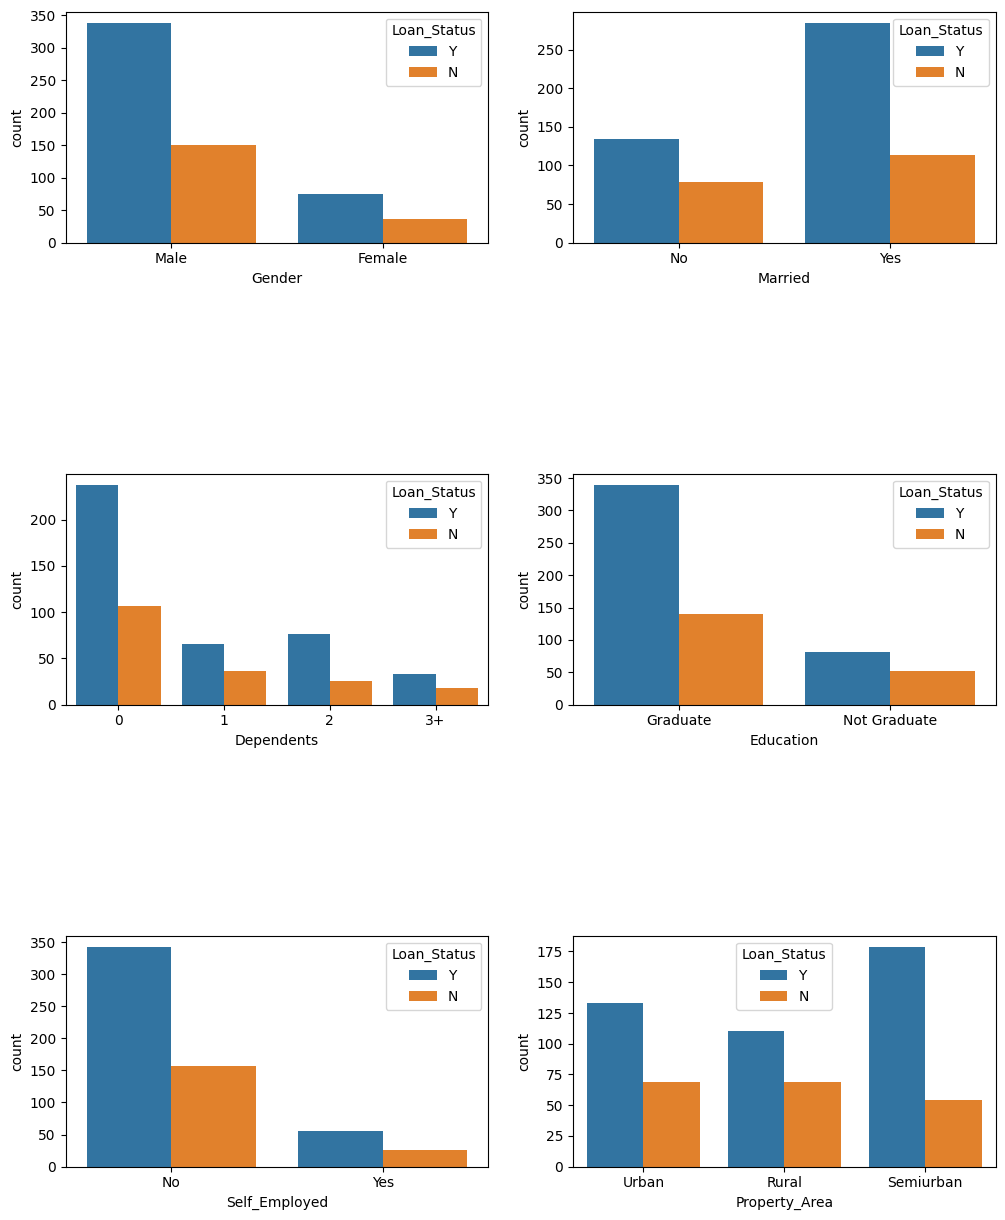

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df.set_index('Loan_ID', inplace = True)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols = categorical_cols.drop('Loan_Status')
fig,axes = plt.subplots(3,2,figsize=(12,15))
for idx, cat_col in enumerate(categorical_cols):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

The following bargraphs help us visualize the frequency of all the variables in the dataset. The goal is to identify different classes and potential outliers

<Axes: >

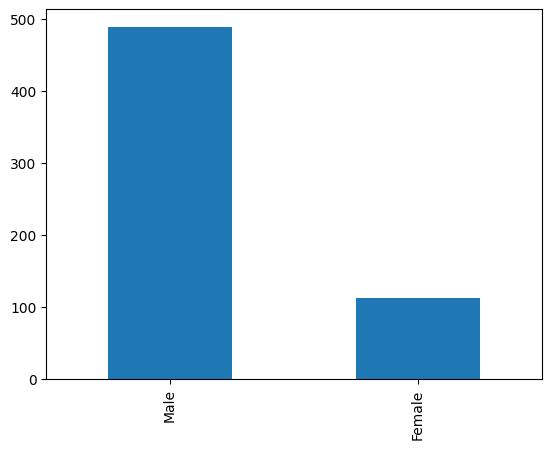

In [ ]:
df['Gender'].value_counts().plot(kind='bar')

<Axes: >

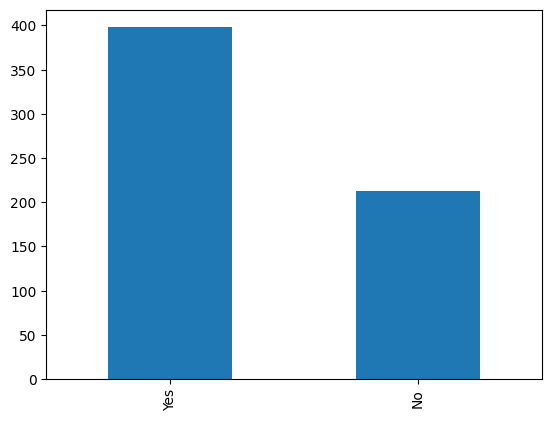

In [ ]:
df['Married'].value_counts().plot(kind='bar')

<Axes: >

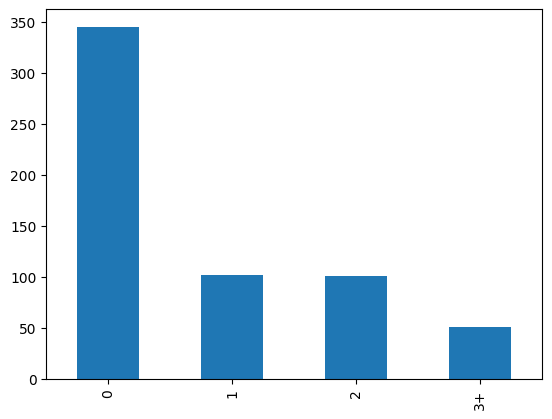

In [ ]:
df['Dependents'].value_counts().plot(kind='bar')

<Axes: >

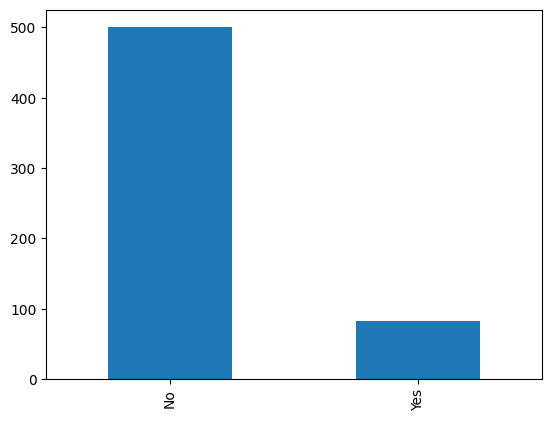

In [ ]:
df['Self_Employed'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

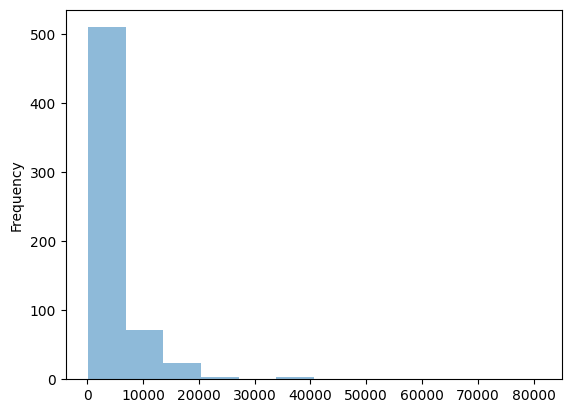

In [ ]:
df['ApplicantIncome'].plot.hist(bins=12, alpha=0.5)

<Axes: ylabel='Frequency'>

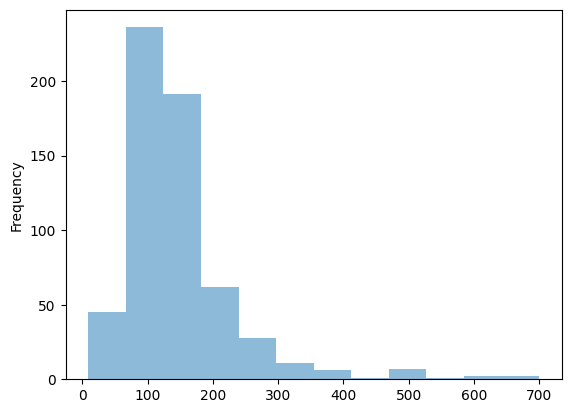

In [ ]:
df['LoanAmount'].plot.hist(bins=12, alpha=0.5)

<Axes: >

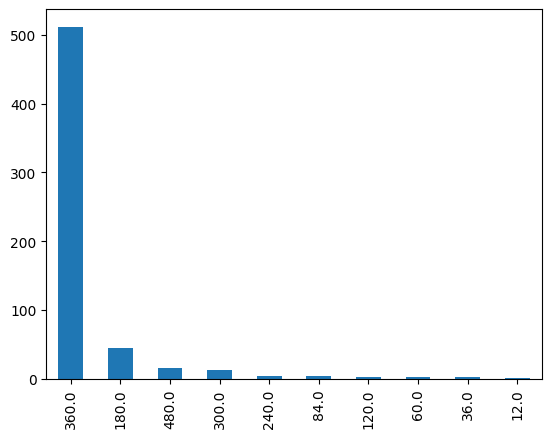

In [ ]:
df['Loan_Amount_Term'].value_counts().plot(kind='bar')

<Axes: >

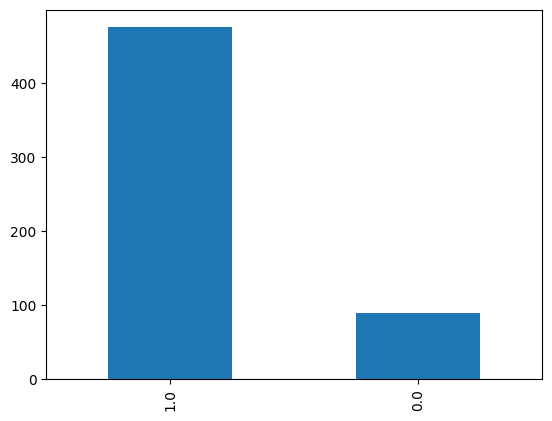

In [ ]:
df['Credit_History'].value_counts().plot(kind='bar')

<Axes: >

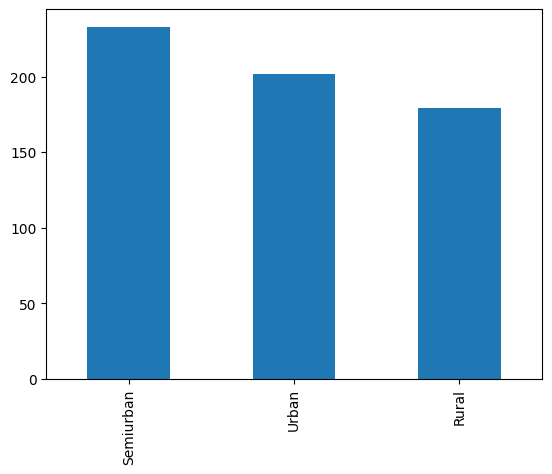

In [ ]:
df['Property_Area'].value_counts().plot(kind='bar')

<Axes: >

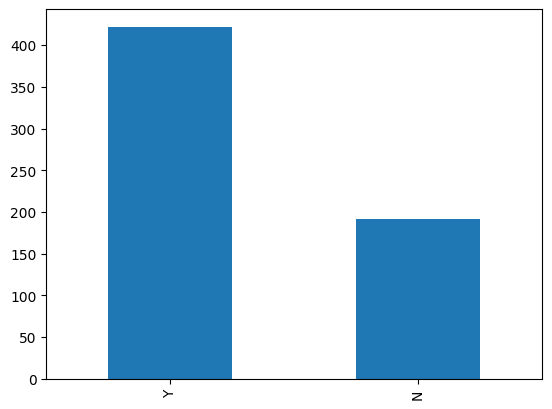

In [ ]:
df['Loan_Status'].value_counts().plot(kind='bar')

### Outliers

We notice that the columns LoanAmount and ApplicantIncome have skewed distribution and they have some outliers.

We need to check these outliers to understand if they should be removed or not

In [ ]:
df[df['ApplicantIncome'] >= 20000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
LP001922,Male,Yes,0,Graduate,No,20667,0.0,NaN,360.0,1.0,Rural,N
LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,N
LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y


In [ ]:
df[df['LoanAmount'] >= 300]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y
LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N


We see that the outliers for the column 'ApplicantIncome' could be true because all of them have a graduate level of education and there is a strong correlation between education level and income

For the column 'LoanAmount', we see that the ApplicantIncome and coapplicantIncome are bigger than the average and that could explain why they have a big loanAmount.

Therefore, we keep the outliers

### Group Variables

In order to simplify the learning process of an algorithm, we have decided to group variables in a logical way

For the column Loan_amount_term, we change from months to years and then we group the years in three groups: 0-15, 16-29, 30+

In [ ]:
conditions = [
    (df['Loan_Amount_Term'] <= 180),
    (df['Loan_Amount_Term'] > 180) & ((df['Loan_Amount_Term'] < 360)),
    (df['Loan_Amount_Term'] >= 360)]
choices = ['0-15', '16-29', '30+']
df['Loan_Term_years'] = np.select(conditions,choices, default= '30+')
df.drop(['Loan_Amount_Term'], axis = 1, inplace = True)

<Axes: >

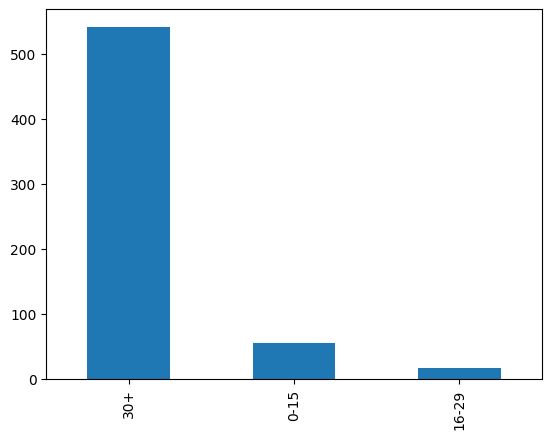

In [ ]:
df['Loan_Term_years'].value_counts().plot(kind='bar')

We go from multiple dependents, to a column with only two variables Yes or No

In [ ]:
conditions = [
    (df['Dependents'] == '0'),
    (df['Dependents'] != '0')]
choices = ['No', 'Yes']
df['flag_dependent'] = np.select(conditions,choices, default= 'No')
df.drop(['Dependents'], axis = 1, inplace = True)

<Axes: >

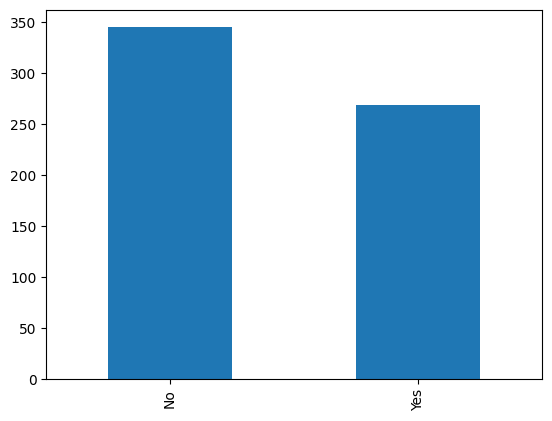

In [ ]:
df['flag_dependent'].value_counts().plot(kind='bar')

We just change the 0 or 1 to Yes or NO. In order to change the column type from numerical to categorical

In [ ]:
conditions = [
    (df['Credit_History'] == 1),
    (df['Credit_History'] == 0)]
choices = ['Yes', 'No']
df['flag_history'] = np.select(conditions,choices, default= 'No')
df.drop(['Credit_History'], axis = 1, inplace = True)

<Axes: >

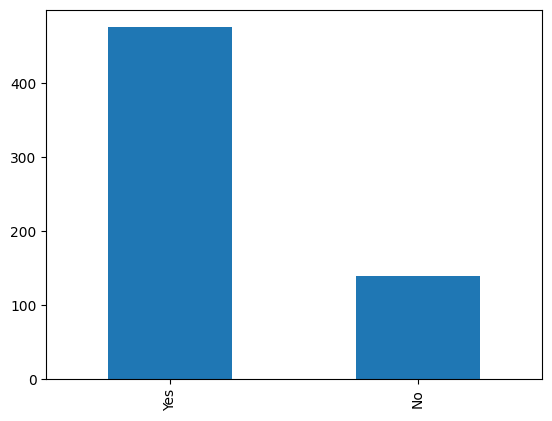

In [ ]:
df['flag_history'].value_counts().plot(kind='bar')

### Fill null values

In [ ]:
df.isnull().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Property_Area         0
Loan_Status           0
Loan_Term_years       0
flag_dependent        0
flag_history          0
dtype: int64

We fill 'categorical' variables with the most common value and the 'numerical' variables with the median because we don't have a normal distribtuion

In [ ]:
df['Gender'].fillna(
    df['Gender'].value_counts().index[0], inplace = True)

df['Married'].fillna(
    df['Married'].value_counts().index[0], inplace = True)

df['Self_Employed'].fillna(
    df['Self_Employed'].value_counts().index[0], inplace = True)

df['LoanAmount'].fillna(
  df['LoanAmount'].median(), inplace = True)

In [ ]:
df.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Property_Area        0
Loan_Status          0
Loan_Term_years      0
flag_dependent       0
flag_history         0
dtype: int64

### Modeling Gridsearch

In [ ]:
#split the dataset
from sklearn.model_selection import train_test_split
X = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=120,stratify=y)

In [ ]:
# get the list of categorical columns and numerical columns
numerical_cols = X_train.select_dtypes(include=np.number).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
X_train[categorical_cols] = X_train[categorical_cols].astype(str)
X_train[numerical_cols] = X_train[numerical_cols].astype('float64')

We have two important steps before modeling our dataset:


*   Encode categorical variables using OneHotEncoder because machine learning models only accept numerical variables.
*   Scale numerical variables using StandardScaler in order for machine learning models to interpret these features on the same scale



We define a "ColumnTransformer" and store it in variable called "preprocessor". This preprocessor will perform the two steps above

We also use SMOTE to oversample and balance the target variable. Since we have an unbalanced dataset, it could lead to a biased model. So we need to balance it.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto', k_neighbors=3)


categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop ='first')
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ("categorical encoding", categorical_preprocessor, categorical_cols),
    ("numerical encoding", numerical_preprocessor, numerical_cols)
])

We create a pipeline that will perform three tasks on the dataset:


*   Use 'preprocessor' to scale and encode the data
*   Perform oversampling using 'SMOTE' to balance the target variable and avoid a biased model
*   Fitting the model selected to the data and train it


We create a gridsearch that will go through all possible combinations of parameters and only keep the the model with parameters that give the best score. The model is validated using cross validation inside the gridsearch.

We compare the results of multiple models and choose the model that gives us the best results

In [ ]:
%%time
from sklearn.svm import SVC

svc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('Over_sampler', sm),
    ("classifier",SVC())
])

# make lists of different parameters to check
parameters = {
              'classifier__C': [ 1000,0.1, 10, 100, 1],
              'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'classifier__kernel': ['rbf','linear']
  }

grid_search_svm = GridSearchCV(svc_pipeline,
                               param_grid=parameters,
                               cv=5,
                               n_jobs = -1,
                               scoring = 'f1_weighted',
                               error_score='raise',
                               verbose = 1
                               )

grid_search_svm.fit(X_train, y_train)
print("Best score:")
print(str(round(grid_search_svm.best_score_*100))+'%')
print("Best parameters found:")
print(grid_search_svm.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best score:
76%
Best parameters found:
{'classifier__C': 100, 'classifier__gamma': 0.0001, 'classifier__kernel': 'rbf'}
CPU times: user 3.26 s, sys: 301 ms, total: 3.56 s
Wall time: 6min 41s


In [ ]:
print('F1 Score on training set: ')
print(str(round(grid_search_svm.score(X_train, y_train)*100))+'%')
print('F1 Score on test set: ')
print(str(round(grid_search_svm.score(X_test, y_test)*100))+'%')

grid_predictions_svm = grid_search_svm.predict(X_test)
# print classification report
print('classification report')
print(classification_report(y_test, grid_predictions_svm))

F1 Score on training set: 
76%
F1 Score on test set: 
77%
classification report
              precision    recall  f1-score   support

           N       0.71      0.52      0.60        58
           Y       0.80      0.91      0.85       127

    accuracy                           0.78       185
   macro avg       0.76      0.71      0.73       185
weighted avg       0.78      0.78      0.77       185



In [ ]:
%%time
from sklearn.linear_model import LogisticRegression

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('Over_sampler', sm),
    ("classifier",LogisticRegression())
])

parameters = {
              'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'classifier__penalty': ['l2'],
              'classifier__C': [100, 10, 1.0, 0.1, 0.01]
  }

grid_search_lr = GridSearchCV(lr_pipeline,
                              param_grid=parameters,
                              cv=5,
                              n_jobs = -1,
                              scoring = 'f1_weighted',
                              error_score='raise',
                              verbose = 1)

grid_search_lr.fit(X_train, y_train)
print("Best score:")
print(str(round(grid_search_lr.best_score_*100))+'%')
print("Best parameters found:")
print(grid_search_lr.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best score:
73%
Best parameters found:
{'classifier__C': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
CPU times: user 229 ms, sys: 11 ms, total: 240 ms
Wall time: 1.98 s


In [ ]:
print('F1 Score on training set: ')
print(str(round(grid_search_lr.score(X_train, y_train)*100))+'%')
print('F1 Score on test set: ')
print(str(round(grid_search_lr.score(X_test, y_test)*100))+'%')

grid_predictions_lr = grid_search_lr.predict(X_test)
# print classification report
print('classification report')
print(classification_report(y_test, grid_predictions_lr))

F1 Score on training set: 
71%
F1 Score on test set: 
69%
classification report
              precision    recall  f1-score   support

           N       0.49      0.67      0.57        58
           Y       0.82      0.69      0.75       127

    accuracy                           0.68       185
   macro avg       0.66      0.68      0.66       185
weighted avg       0.72      0.68      0.69       185



In [ ]:
%%time
from sklearn.linear_model import RidgeClassifier

rc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('Over_sampler', sm),
    ("classifier",RidgeClassifier())
])

parameters = {
              'classifier__alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
  }

grid_search_rc = GridSearchCV(rc_pipeline,
                              param_grid=parameters,
                              cv=5,
                              n_jobs = -1,
                              scoring = 'f1_weighted',
                              error_score='raise',
                              verbose = 1)

grid_search_rc.fit(X_train, y_train)
print("Best score:")
print(str(round(grid_search_rc.best_score_*100))+'%')
print("Best parameters found:")
print(grid_search_rc.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best score:
73%
Best parameters found:
{'classifier__alpha': 0.8}
CPU times: user 174 ms, sys: 4.43 ms, total: 179 ms
Wall time: 1.21 s


In [ ]:
print('F1 Score on training set: ')
print(str(round(grid_search_rc.score(X_train, y_train)*100))+'%')
print('F1 Score on test set: ')
print(str(round(grid_search_rc.score(X_test, y_test)*100))+'%')

grid_predictions_rc = grid_search_rc.predict(X_test)
# print classification report
print('classification report')
print(classification_report(y_test, grid_predictions_rc))

F1 Score on training set: 
74%
F1 Score on test set: 
77%
classification report
              precision    recall  f1-score   support

           N       0.67      0.59      0.62        58
           Y       0.82      0.87      0.84       127

    accuracy                           0.78       185
   macro avg       0.74      0.73      0.73       185
weighted avg       0.77      0.78      0.77       185



In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('Over_sampler', sm),
    ("classifier",KNeighborsClassifier())
])

parameters = {
              'classifier__n_neighbors': range(1, 21, 2),
              'classifier__weights': ['uniform', 'distance'],
              'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
  }

grid_search_knn = GridSearchCV(knn_pipeline,
                              param_grid=parameters,
                              cv=5,
                              n_jobs = -1,
                              scoring = 'f1_weighted',
                              error_score='raise',
                               verbose = 1)

grid_search_knn.fit(X_train, y_train)
print("Best score:")
print(str(round(grid_search_knn.best_score_*100))+'%')
print("Best parameters found:")
print(grid_search_knn.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best score:
69%
Best parameters found:
{'classifier__metric': 'manhattan', 'classifier__n_neighbors': 19, 'classifier__weights': 'distance'}
CPU times: user 696 ms, sys: 16.5 ms, total: 712 ms
Wall time: 8.96 s


In [ ]:
print('F1 Score on training set: ')
print(str(round(grid_search_knn.score(X_train, y_train)*100))+'%')
print('F1 Score on test set: ')
print(str(round(grid_search_knn.score(X_test, y_test)*100))+'%')

grid_predictions_knn = grid_search_knn.predict(X_test)
# print classification report
print('classification report')
print(classification_report(y_test, grid_predictions_knn))

F1 Score on training set: 
100%
F1 Score on test set: 
66%
classification report
              precision    recall  f1-score   support

           N       0.46      0.55      0.50        58
           Y       0.77      0.70      0.74       127

    accuracy                           0.65       185
   macro avg       0.62      0.63      0.62       185
weighted avg       0.67      0.65      0.66       185



In [ ]:
%%time
from sklearn.ensemble import BaggingClassifier

bc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('Over_sampler', sm),
    ("classifier",BaggingClassifier())
])

parameters = {
              'classifier__n_estimators': [10, 100, 1000]
  }


grid_search_bc = GridSearchCV(bc_pipeline,
                              param_grid=parameters,
                              cv=5,
                              n_jobs = -1,
                              scoring = 'f1_weighted',
                              error_score='raise',
                              verbose = 1)

grid_search_bc.fit(X_train, y_train)
print("Best score:")
print(str(round(grid_search_bc.best_score_*100))+'%')
print("Best parameters found:")
print(grid_search_bc.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best score:
69%
Best parameters found:
{'classifier__n_estimators': 1000}
CPU times: user 3.37 s, sys: 33.1 ms, total: 3.4 s
Wall time: 19.3 s


In [ ]:
print('F1 Score on training set: ')
print(str(round(grid_search_bc.score(X_train, y_train)*100))+'%')
print('F1 Score on test set: ')
print(str(round(grid_search_bc.score(X_test, y_test)*100))+'%')

grid_predictions_bc = grid_search_bc.predict(X_test)
# print classification report
print('classification report')
print(classification_report(y_test, grid_predictions_bc))

F1 Score on training set: 
100%
F1 Score on test set: 
74%
classification report
              precision    recall  f1-score   support

           N       0.61      0.53      0.57        58
           Y       0.80      0.84      0.82       127

    accuracy                           0.75       185
   macro avg       0.70      0.69      0.69       185
weighted avg       0.74      0.75      0.74       185



In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

rfc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('Over_sampler', sm),
    ("classifier", RandomForestClassifier())
])

parameters = {
              'classifier__n_estimators': [10, 100, 1000],
              'classifier__max_features': ['sqrt', 'log2']
  }

grid_search_rfc = GridSearchCV(rfc_pipeline,
                              param_grid=parameters,
                              cv=5,
                              n_jobs = -1,
                              scoring = 'f1_weighted',
                              error_score='raise')

grid_search_rfc.fit(X_train, y_train)
print("Best score:")
print(str(round(grid_search_rfc.best_score_*100))+'%')
print("Best parameters found:")
print(grid_search_rfc.best_params_)

Best score:
73%
Best parameters found:
{'classifier__max_features': 'sqrt', 'classifier__n_estimators': 1000}
CPU times: user 2.31 s, sys: 21.4 ms, total: 2.33 s
Wall time: 25.8 s


In [ ]:
print('F1 Score on training set: ')
print(str(round(grid_search_rfc.score(X_train, y_train)*100))+'%')
print('F1 Score on test set: ')
print(str(round(grid_search_rfc.score(X_test, y_test)*100))+'%')

grid_predictions_rfc = grid_search_rfc.predict(X_test)
# print classification report
print('classification report')
print(classification_report(y_test, grid_predictions_rfc))

F1 Score on training set: 
100%
F1 Score on test set: 
72%
classification report
              precision    recall  f1-score   support

           N       0.58      0.50      0.54        58
           Y       0.79      0.83      0.81       127

    accuracy                           0.73       185
   macro avg       0.68      0.67      0.67       185
weighted avg       0.72      0.73      0.72       185



In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

stb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('Over_sampler', sm),
    ("classifier", GradientBoostingClassifier())
])

parameters = {
              'classifier__n_estimators': [10, 100, 1000],
              'classifier__learning_rate': [0.001, 0.01, 0.1],
              'classifier__subsample': [0.5, 0.7, 1.0],
              'classifier__max_depth': [3, 7, 9]
  }

grid_search_stb = GridSearchCV(stb_pipeline,
                              param_grid=parameters,
                              cv=5,
                              n_jobs = -1,
                              scoring = 'f1_weighted',
                              error_score='raise',
                              verbose = 1)

grid_search_stb.fit(X_train, y_train)
print("Best score:")
print(str(round(grid_search_stb.best_score_*100))+'%')
print("Best parameters found:")
print(grid_search_stb.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best score:
74%
Best parameters found:
{'classifier__learning_rate': 0.001, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 0.5}
CPU times: user 4.35 s, sys: 316 ms, total: 4.66 s
Wall time: 7min 15s


In [ ]:
print('F1 Score on training set: ')
print(str(round(grid_search_stb.score(X_train, y_train)*100))+'%')
print('F1 Score on test set: ')
print(str(round(grid_search_stb.score(X_test, y_test)*100))+'%')

grid_predictions_stb = grid_search_stb.predict(X_test)
# print classification report
print('classification report')
print(classification_report(y_test, grid_predictions_stb))

F1 Score on training set: 
77%
F1 Score on test set: 
78%
classification report
              precision    recall  f1-score   support

           N       0.72      0.53      0.61        58
           Y       0.81      0.91      0.86       127

    accuracy                           0.79       185
   macro avg       0.77      0.72      0.73       185
weighted avg       0.78      0.79      0.78       185



We see that the algorithm "Gradient Boosting Classifier" gives us a precision of 72% for the class 'No' and 81% for the class 'Yes' with an overall accuracy of 80%

### Evaluating the results

We check which features have the biggest impact on the model

In [ ]:
def delete_before_separator(words, separator):
    modified_words = []
    for word in words:
        index = word.find(separator)
        if index != -1:  # Separator found
            modified_words.append(word[index+2:])
        else:
            modified_words.append(word)  # Separator not found, keep the original word
    return modified_words
feature_names = grid_search_stb.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
feature_names = delete_before_separator(feature_names, '__')

<Axes: title={'center': 'Feature Importance'}>

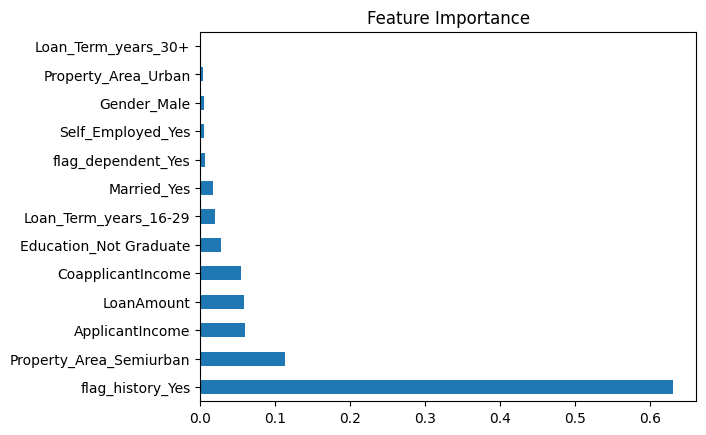

In [ ]:
importance = grid_search_stb.best_estimator_._final_estimator.feature_importances_
feat_importances = pd.Series(importance, index=feature_names)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

Improve the comments and explanations before each steps

### Sandbox (dirty code, not important)

In [ ]:
from sklearn.svm import SVC

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
model_svc = make_pipeline(preprocessor, svc)
model_svc.fit(X_train,y_train)

print('Score on training set: ')
print(model_svc.score(X_train, y_train))
print('Score on test set: ')
print(model_svc.score(X_test, y_test))

pred = model_svc.predict(X_test)
print("Test F1 Score: ", f1_score(y_test, pred, average = 'weighted'))
print('Classification report: ')
print(classification_report(y_test, pred))

Score on training set: 
0.7808857808857809
Score on test set: 
0.7783783783783784
Test F1 Score:  0.7663014910247382
Classification report: 
              precision    recall  f1-score   support

           N       0.71      0.50      0.59        58
           Y       0.80      0.91      0.85       127

    accuracy                           0.78       185
   macro avg       0.75      0.70      0.72       185
weighted avg       0.77      0.78      0.77       185



In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 100, penalty = 'l2', solver = 'newton-cg')
model_lr = make_pipeline(preprocessor, lr)
model_lr.fit(X_train,y_train)

print('Score on training set: ')
print(model_lr.score(X_train, y_train))
print('Score on test set: ')
print(model_lr.score(X_test, y_test))

pred = model_lr.predict(X_test)
print("Test F1 Score: ", f1_score(y_test, pred, average = 'weighted'))
print('Classification report: ')
print(classification_report(y_test, pred))

Score on training set: 
0.7738927738927739
Score on test set: 
0.7675675675675676
Test F1 Score:  0.752891874541359
Classification report: 
              precision    recall  f1-score   support

           N       0.69      0.47      0.56        58
           Y       0.79      0.91      0.84       127

    accuracy                           0.77       185
   macro avg       0.74      0.69      0.70       185
weighted avg       0.76      0.77      0.75       185



In [ ]:
from sklearn.linear_model import RidgeClassifier

rc = RidgeClassifier(alpha = 0.1)
model_rc = make_pipeline(preprocessor, rc)
model_rc.fit(X_train,y_train)

print('Score on training set: ')
print(model_rc.score(X_train, y_train))
print('Score on test set: ')
print(model_rc.score(X_test, y_test))

pred = model_rc.predict(X_test)
print("Test F1 Score: ", f1_score(y_test, pred, average = 'weighted'))
print('Classification report: ')
print(classification_report(y_test, pred))

Score on training set: 
0.7715617715617715
Score on test set: 
0.772972972972973
Test F1 Score:  0.7596354758119465
Classification report: 
              precision    recall  f1-score   support

           N       0.70      0.48      0.57        58
           Y       0.79      0.91      0.85       127

    accuracy                           0.77       185
   macro avg       0.75      0.69      0.71       185
weighted avg       0.76      0.77      0.76       185



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='manhattan', n_neighbors = 3, weights = 'uniform')
model_knn = make_pipeline(preprocessor, knn)
model_knn.fit(X_train,y_train)

print('Score on training set: ')
print(model_knn.score(X_train, y_train))
print('Score on test set: ')
print(model_knn.score(X_test, y_test))

pred = model_knn.predict(X_test)
print("Test F1 Score: ", f1_score(y_test, pred, average = 'weighted'))
print('Classification report: ')
print(classification_report(y_test, pred))

Score on training set: 
0.8275058275058275
Score on test set: 
0.7135135135135136
Test F1 Score:  0.7024086593411345
Classification report: 
              precision    recall  f1-score   support

           N       0.56      0.43      0.49        58
           Y       0.76      0.84      0.80       127

    accuracy                           0.71       185
   macro avg       0.66      0.64      0.64       185
weighted avg       0.70      0.71      0.70       185



In [ ]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(n_estimators = 100)
model_bc = make_pipeline(preprocessor, bc)
model_bc.fit(X_train,y_train)

print('Score on training set: ')
print(model_bc.score(X_train, y_train))
print('Score on test set: ')
print(model_bc.score(X_test, y_test))

pred = model_bc.predict(X_test)
print("Test F1 Score: ", f1_score(y_test, pred, average = 'weighted'))
print('Classification report: ')
print(classification_report(y_test, pred))

Score on training set: 
1.0
Score on test set: 
0.7567567567567568
Test F1 Score:  0.7490638886865302
Classification report: 
              precision    recall  f1-score   support

           N       0.64      0.52      0.57        58
           Y       0.80      0.87      0.83       127

    accuracy                           0.76       185
   macro avg       0.72      0.69      0.70       185
weighted avg       0.75      0.76      0.75       185



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features = 'log2', n_estimators = 1000)
model_rf = make_pipeline(preprocessor, rf)
model_rf.fit(X_train,y_train)

print('Score on training set: ')
print(model_rf.score(X_train, y_train))
print('Score on test set: ')
print(model_rf.score(X_test, y_test))

pred = model_rf.predict(X_test)
print("Test F1 Score: ", f1_score(y_test, pred, average = 'weighted'))
print('Classification report: ')
print(classification_report(y_test, pred))

Score on training set: 
1.0
Score on test set: 
0.7297297297297297
Test F1 Score:  0.7182410681093738
Classification report: 
              precision    recall  f1-score   support

           N       0.59      0.45      0.51        58
           Y       0.77      0.86      0.81       127

    accuracy                           0.73       185
   macro avg       0.68      0.65      0.66       185
weighted avg       0.72      0.73      0.72       185



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 3, n_estimators = 10, subsample = 0.5)
model_gb = make_pipeline(preprocessor, gb)
model_gb.fit(X_train,y_train)

print('Score on training set: ')
print(model_gb.score(X_train, y_train))
print('Score on test set: ')
print(model_gb.score(X_test, y_test))

pred = model_gb.predict(X_test)
print("Test F1 Score: ", f1_score(y_test, pred, average = 'weighted'))
print('Classification report: ')
print(classification_report(y_test, pred))

Score on training set: 
0.7832167832167832
Score on test set: 
0.7567567567567568
Test F1 Score:  0.7367768373940495
Classification report: 
              precision    recall  f1-score   support

           N       0.69      0.41      0.52        58
           Y       0.77      0.91      0.84       127

    accuracy                           0.76       185
   macro avg       0.73      0.66      0.68       185
weighted avg       0.75      0.76      0.74       185

